<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Forest-cover-type-Prediction" data-toc-modified-id="Forest-cover-type-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Forest cover type Prediction</a></span><ul class="toc-item"><li><span><a href="#Data-Interpretation" data-toc-modified-id="Data-Interpretation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Interpretation</a></span></li></ul></li><li><span><a href="#Data-Handling" data-toc-modified-id="Data-Handling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Handling</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Data-Interpretation" data-toc-modified-id="Data-Interpretation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Interpretation</a></span><ul class="toc-item"><li><span><a href="#Getting-the-right-subset-of-columns" data-toc-modified-id="Getting-the-right-subset-of-columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Getting the right subset of columns</a></span></li></ul></li></ul></div>

# Forest cover type Prediction

## Data Interpretation

<a href='https://www.kaggle.com/c/forest-cover-type-prediction'>Kaggle Competition link</a>

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

- 1 - Spruce/Fir
- 2 - Lodgepole Pine
- 3 - Ponderosa Pine
- 4 - Cottonwood/Willow
- 5 - Aspen
- 6 - Douglas-fir
- 7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

Data Fields
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

- 1 - Rawah Wilderness Area
- 2 - Neota Wilderness Area
- 3 - Comanche Peak Wilderness Area
- 4 - Cache la Poudre Wilderness Area

The soil types are:

- 1 Cathedral family - Rock outcrop complex, extremely stony.
- 2 Vanet - Ratake families complex, very stony.
- 3 Haploborolis - Rock outcrop complex, rubbly.
- 4 Ratake family - Rock outcrop complex, rubbly.
- 5 Vanet family - Rock outcrop complex complex, rubbly.
- 6 Vanet - Wetmore families - Rock outcrop complex, stony.
- 7 Gothic family.
- 8 Supervisor - Limber families complex.
- 9 Troutville family, very stony.
- 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11 Bullwark - Catamount families - Rock land complex, rubbly.
- 12 Legault family - Rock land complex, stony.
- 13 Catamount family - Rock land - Bullwark family complex, rubbly.
- 14 Pachic Argiborolis - Aquolis complex.
- 15 unspecified in the USFS Soil and ELU Survey.
- 16 Cryaquolis - Cryoborolis complex.
- 17 Gateview family - Cryaquolis complex.
- 18 Rogert family, very stony.
- 19 Typic Cryaquolis - Borohemists complex.
- 20 Typic Cryaquepts - Typic Cryaquolls complex.
- 21 Typic Cryaquolls - Leighcan family, till substratum complex.
- 22 Leighcan family, till substratum, extremely bouldery.
- 23 Leighcan family, till substratum - Typic Cryaquolls complex.
- 24 Leighcan family, extremely stony.
- 25 Leighcan family, warm, extremely stony.
- 26 Granile - Catamount families complex, very stony.
- 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28 Leighcan family - Rock outcrop complex, extremely stony.
- 29 Como - Legault families complex, extremely stony.
- 30 Como family - Rock land - Legault family complex, extremely stony.
- 31 Leighcan - Catamount families complex, extremely stony.
- 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34 Cryorthents - Rock land complex, extremely stony.
- 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40 Moran family - Cryorthents - Rock land complex, extremely stony.

# Data Handling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
data_path = '../data/forest_cover_type/train.csv'
test_path = '../data/forest_cover_type/test.csv'

train_data = pd.read_csv(data_path)
test_data = pd.read_csv(test_path)

pd.options.display.max_columns = None
target = 'Cover_Type'

In [3]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
train_data.set_index(['Id'])

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [5]:
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.set_index(['Id'])

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581008,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581009,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581010,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
all_data = pd.concat([train_data, test_data])

In [8]:
all_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.0
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.0
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.0


In [9]:
all_data.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
565887,581008,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
565888,581009,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
565889,581010,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
565890,581011,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
565891,581012,2383,165,13,60,4,67,231,244,141,875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [10]:
all_data.set_index(['Id'])

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.0
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.0
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581008,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
581009,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
581010,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


# Missing Values

In [11]:
all_data.isnull().mean()

Id                                    0.000000
Elevation                             0.000000
Aspect                                0.000000
Slope                                 0.000000
Horizontal_Distance_To_Hydrology      0.000000
Vertical_Distance_To_Hydrology        0.000000
Horizontal_Distance_To_Roadways       0.000000
Hillshade_9am                         0.000000
Hillshade_Noon                        0.000000
Hillshade_3pm                         0.000000
Horizontal_Distance_To_Fire_Points    0.000000
Wilderness_Area1                      0.000000
Wilderness_Area2                      0.000000
Wilderness_Area3                      0.000000
Wilderness_Area4                      0.000000
Soil_Type1                            0.000000
Soil_Type2                            0.000000
Soil_Type3                            0.000000
Soil_Type4                            0.000000
Soil_Type5                            0.000000
Soil_Type6                            0.000000
Soil_Type7   

We can infer that no column has any missing values

# Data Interpretation

In [12]:
soil_columns = [col for col in train_data.columns.to_list() if col.startswith('Soil_Type')]
display(soil_columns)
other_columns = [col for col in train_data.columns.to_list() if not col.startswith('Soil_Type')]
other_columns.remove('Id')
display(other_columns)

['Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Cover_Type']

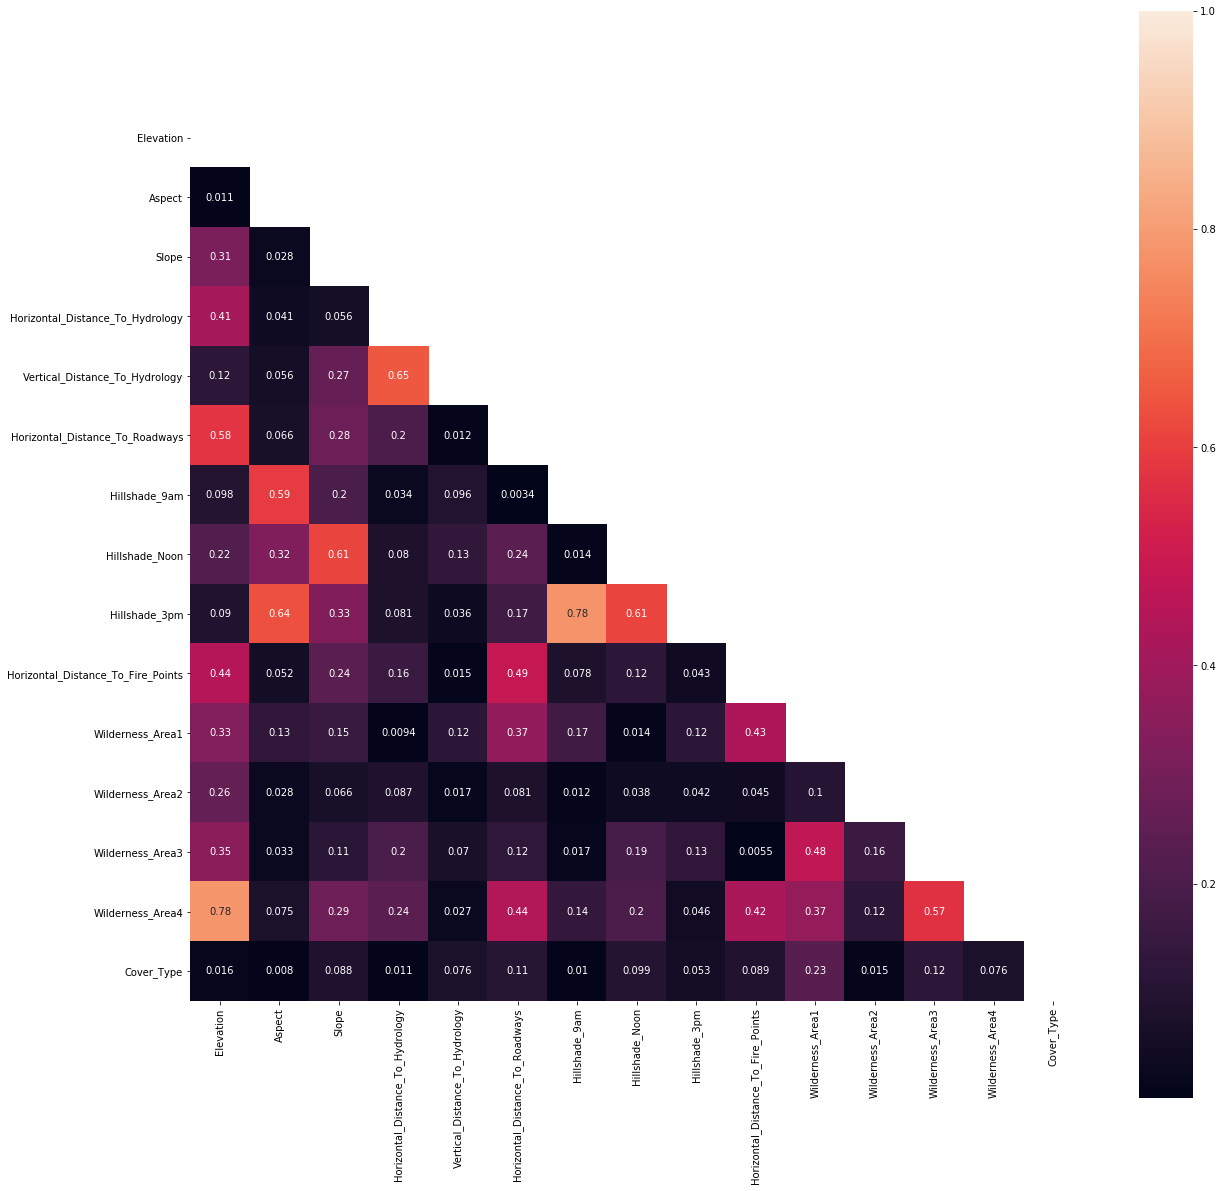

In [13]:
mask = np.zeros_like(train_data[other_columns].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(data=abs(train_data[other_columns].corr()), annot=True, square=True, mask=mask)

In [14]:
abs_correlation = train_data[other_columns].corr().abs()
mask = np.zeros_like(abs_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
masked_abs_correlation = abs_correlation.mask(mask).unstack()
masked_abs_correlation.loc[masked_abs_correlation.notnull()].sort_values(ascending=False).head(30)

Elevation                           Wilderness_Area4                      0.783651
Hillshade_9am                       Hillshade_3pm                         0.779965
Horizontal_Distance_To_Hydrology    Vertical_Distance_To_Hydrology        0.652142
Aspect                              Hillshade_3pm                         0.635022
Hillshade_Noon                      Hillshade_3pm                         0.614526
Slope                               Hillshade_Noon                        0.612613
Aspect                              Hillshade_9am                         0.593997
Elevation                           Horizontal_Distance_To_Roadways       0.578659
Wilderness_Area3                    Wilderness_Area4                      0.569200
Horizontal_Distance_To_Roadways     Horizontal_Distance_To_Fire_Points    0.486386
Wilderness_Area1                    Wilderness_Area3                      0.475352
Elevation                           Horizontal_Distance_To_Fire_Points    0.443563
Hori

We can infer that following columns have high correlation->
- Hillshade_9am and Hillshade_3pm
- Hillshade_Noon and Hillshade_3pm
- Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology
- Elevation and Horizontal_Distance_To_Roadways
- Aspect and Hillshade_3pm
- Aspect and Hillshade_9am
- Slope and Hillshade_Noon

So dropping Hillshade_9am, Hillshade_3pm, Hillshade_Noon, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways

In [15]:
other_columns = [col for col in other_columns if col not in ('Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm')]

In [16]:
display(other_columns)

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Cover_Type']

In [17]:
soil_correlation_target = {}
for col in soil_columns:
    abs_correlation_soil = train_data[other_columns + [col]].corr().abs().iloc[-1]
    print(col + '-correlation')
    display(abs_correlation_soil.sort_values(ascending=False)[1:])
    soil_correlation_target[col] = abs_correlation_soil[target]

Soil_Type1-correlation


Wilderness_Area4                      0.231772
Elevation                             0.218818
Wilderness_Area3                      0.131925
Horizontal_Distance_To_Fire_Points    0.112305
Slope                                 0.099355
Wilderness_Area1                      0.086633
Horizontal_Distance_To_Hydrology      0.084766
Wilderness_Area2                      0.028646
Aspect                                0.024538
Cover_Type                            0.015069
Name: Soil_Type1, dtype: float64

Soil_Type2-correlation


Elevation                             0.147947
Wilderness_Area1                      0.115822
Horizontal_Distance_To_Fire_Points    0.102469
Slope                                 0.081498
Wilderness_Area4                      0.063627
Wilderness_Area3                      0.054204
Wilderness_Area2                      0.038297
Horizontal_Distance_To_Hydrology      0.024234
Cover_Type                            0.022627
Aspect                                0.020970
Name: Soil_Type2, dtype: float64

Soil_Type3-correlation


Wilderness_Area4                      0.345069
Elevation                             0.307523
Slope                                 0.265541
Wilderness_Area3                      0.180051
Horizontal_Distance_To_Fire_Points    0.148199
Wilderness_Area1                      0.145638
Horizontal_Distance_To_Hydrology      0.089578
Aspect                                0.069120
Wilderness_Area2                      0.048156
Cover_Type                            0.016393
Name: Soil_Type3, dtype: float64

Soil_Type4-correlation


Wilderness_Area3                      0.172302
Wilderness_Area1                      0.135763
Elevation                             0.125342
Slope                                 0.087841
Horizontal_Distance_To_Fire_Points    0.060897
Horizontal_Distance_To_Hydrology      0.059398
Wilderness_Area2                      0.044891
Wilderness_Area4                      0.041569
Cover_Type                            0.027816
Aspect                                0.018019
Name: Soil_Type4, dtype: float64

Soil_Type5-correlation


Wilderness_Area4                      0.157005
Elevation                             0.141478
Wilderness_Area3                      0.089367
Slope                                 0.074720
Horizontal_Distance_To_Fire_Points    0.066521
Wilderness_Area1                      0.058686
Cover_Type                            0.027692
Horizontal_Distance_To_Hydrology      0.025247
Wilderness_Area2                      0.019405
Aspect                                0.000343
Name: Soil_Type5, dtype: float64

Soil_Type6-correlation


Wilderness_Area4                      0.316800
Elevation                             0.187354
Wilderness_Area3                      0.180323
Wilderness_Area1                      0.118416
Horizontal_Distance_To_Fire_Points    0.108206
Slope                                 0.047868
Wilderness_Area2                      0.039155
Horizontal_Distance_To_Hydrology      0.021203
Cover_Type                            0.006521
Aspect                                0.006066
Name: Soil_Type6, dtype: float64

Soil_Type7-correlation


Aspect                               NaN
Slope                                NaN
Horizontal_Distance_To_Hydrology     NaN
Horizontal_Distance_To_Fire_Points   NaN
Wilderness_Area1                     NaN
Wilderness_Area2                     NaN
Wilderness_Area3                     NaN
Wilderness_Area4                     NaN
Cover_Type                           NaN
Soil_Type7                           NaN
Name: Soil_Type7, dtype: float64

Soil_Type8-correlation


Horizontal_Distance_To_Fire_Points    0.024910
Wilderness_Area1                      0.014556
Slope                                 0.012989
Cover_Type                            0.008133
Wilderness_Area3                      0.006919
Wilderness_Area4                      0.005441
Elevation                             0.002934
Horizontal_Distance_To_Hydrology      0.002819
Aspect                                0.001723
Wilderness_Area2                      0.001502
Name: Soil_Type8, dtype: float64

Soil_Type9-correlation


Wilderness_Area1                      0.046045
Cover_Type                            0.027012
Slope                                 0.022220
Wilderness_Area3                      0.021887
Aspect                                0.019391
Wilderness_Area4                      0.017211
Horizontal_Distance_To_Fire_Points    0.011705
Elevation                             0.010571
Horizontal_Distance_To_Hydrology      0.005523
Wilderness_Area2                      0.004753
Name: Soil_Type9, dtype: float64

Soil_Type10-correlation


Elevation                             0.357816
Wilderness_Area4                      0.336397
Slope                                 0.255804
Wilderness_Area1                      0.226983
Horizontal_Distance_To_Fire_Points    0.210159
Cover_Type                            0.128972
Horizontal_Distance_To_Hydrology      0.112852
Aspect                                0.111959
Wilderness_Area3                      0.092015
Wilderness_Area2                      0.075053
Name: Soil_Type10, dtype: float64

Soil_Type11-correlation


Wilderness_Area3                      0.134724
Slope                                 0.109798
Wilderness_Area1                      0.092808
Wilderness_Area4                      0.046506
Elevation                             0.037906
Aspect                                0.034549
Wilderness_Area2                      0.030687
Horizontal_Distance_To_Fire_Points    0.028242
Horizontal_Distance_To_Hydrology      0.026150
Cover_Type                            0.010228
Name: Soil_Type11, dtype: float64

Soil_Type12-correlation


Wilderness_Area1                      0.220971
Horizontal_Distance_To_Fire_Points    0.195150
Cover_Type                            0.129985
Slope                                 0.115088
Wilderness_Area3                      0.105039
Wilderness_Area4                      0.082596
Aspect                                0.044142
Horizontal_Distance_To_Hydrology      0.034306
Wilderness_Area2                      0.022808
Elevation                             0.017432
Name: Soil_Type12, dtype: float64

Soil_Type13-correlation


Wilderness_Area3                      0.210372
Wilderness_Area4                      0.120617
Slope                                 0.119863
Wilderness_Area1                      0.100731
Horizontal_Distance_To_Fire_Points    0.045893
Cover_Type                            0.040528
Elevation                             0.039304
Wilderness_Area2                      0.029067
Horizontal_Distance_To_Hydrology      0.026595
Aspect                                0.024312
Name: Soil_Type13, dtype: float64

Soil_Type14-correlation


Elevation                             0.140619
Wilderness_Area4                      0.135777
Horizontal_Distance_To_Hydrology      0.111878
Horizontal_Distance_To_Fire_Points    0.085595
Wilderness_Area3                      0.068786
Wilderness_Area1                      0.059401
Slope                                 0.054085
Cover_Type                            0.022019
Wilderness_Area2                      0.019641
Aspect                                0.001181
Name: Soil_Type14, dtype: float64

Soil_Type15-correlation


Aspect                               NaN
Slope                                NaN
Horizontal_Distance_To_Hydrology     NaN
Horizontal_Distance_To_Fire_Points   NaN
Wilderness_Area1                     NaN
Wilderness_Area2                     NaN
Wilderness_Area3                     NaN
Wilderness_Area4                     NaN
Cover_Type                           NaN
Soil_Type15                          NaN
Name: Soil_Type15, dtype: float64

Soil_Type16-correlation


Horizontal_Distance_To_Hydrology      0.084804
Elevation                             0.066252
Slope                                 0.064321
Wilderness_Area4                      0.034331
Wilderness_Area3                      0.030780
Aspect                                0.027121
Horizontal_Distance_To_Fire_Points    0.019236
Wilderness_Area2                      0.016102
Cover_Type                            0.008793
Wilderness_Area1                      0.005171
Name: Soil_Type16, dtype: float64

Soil_Type17-correlation


Elevation                             0.200663
Horizontal_Distance_To_Hydrology      0.159717
Wilderness_Area4                      0.139257
Slope                                 0.124375
Wilderness_Area1                      0.114752
Horizontal_Distance_To_Fire_Points    0.061680
Cover_Type                            0.042453
Wilderness_Area2                      0.037943
Aspect                                0.029870
Wilderness_Area3                      0.017668
Name: Soil_Type17, dtype: float64

Soil_Type18-correlation


Horizontal_Distance_To_Fire_Points    0.209100
Wilderness_Area1                      0.112973
Slope                                 0.069326
Wilderness_Area3                      0.053702
Wilderness_Area4                      0.042228
Aspect                                0.042140
Elevation                             0.035173
Horizontal_Distance_To_Hydrology      0.018282
Wilderness_Area2                      0.011661
Cover_Type                            0.006312
Name: Soil_Type18, dtype: float64

Soil_Type19-correlation


Slope                                 0.047742
Wilderness_Area4                      0.036957
Horizontal_Distance_To_Hydrology      0.033946
Cover_Type                            0.031824
Elevation                             0.029808
Wilderness_Area1                      0.028364
Horizontal_Distance_To_Fire_Points    0.016304
Wilderness_Area2                      0.009962
Aspect                                0.007570
Wilderness_Area3                      0.006531
Name: Soil_Type19, dtype: float64

Soil_Type20-correlation


Horizontal_Distance_To_Fire_Points    0.084832
Slope                                 0.068508
Wilderness_Area1                      0.068245
Wilderness_Area4                      0.064443
Horizontal_Distance_To_Hydrology      0.062873
Cover_Type                            0.053013
Aspect                                0.023330
Wilderness_Area2                      0.010037
Elevation                             0.008548
Wilderness_Area3                      0.005101
Name: Soil_Type20, dtype: float64

Soil_Type21-correlation


Wilderness_Area3                      0.038255
Slope                                 0.033935
Elevation                             0.032509
Horizontal_Distance_To_Hydrology      0.025207
Cover_Type                            0.024410
Wilderness_Area4                      0.021775
Aspect                                0.018815
Wilderness_Area1                      0.018185
Horizontal_Distance_To_Fire_Points    0.013707
Wilderness_Area2                      0.006013
Name: Soil_Type21, dtype: float64

Soil_Type22-correlation


Cover_Type                            0.195993
Elevation                             0.146236
Wilderness_Area1                      0.122669
Wilderness_Area4                      0.102231
Wilderness_Area2                      0.098218
Slope                                 0.076393
Horizontal_Distance_To_Fire_Points    0.046383
Wilderness_Area3                      0.045651
Aspect                                0.022301
Horizontal_Distance_To_Hydrology      0.007840
Name: Soil_Type22, dtype: float64

Soil_Type23-correlation


Slope                                 0.184528
Elevation                             0.159872
Cover_Type                            0.158762
Wilderness_Area4                      0.153590
Wilderness_Area1                      0.123868
Horizontal_Distance_To_Hydrology      0.087963
Horizontal_Distance_To_Fire_Points    0.080549
Wilderness_Area2                      0.067934
Aspect                                0.041880
Wilderness_Area3                      0.012369
Name: Soil_Type23, dtype: float64

Soil_Type24-correlation


Cover_Type                            0.100797
Elevation                             0.097647
Wilderness_Area2                      0.090273
Wilderness_Area4                      0.087973
Wilderness_Area3                      0.069546
Horizontal_Distance_To_Fire_Points    0.054324
Horizontal_Distance_To_Hydrology      0.046915
Wilderness_Area1                      0.022999
Slope                                 0.017982
Aspect                                0.005480
Name: Soil_Type24, dtype: float64

Soil_Type25-correlation


Wilderness_Area2                      0.044023
Horizontal_Distance_To_Fire_Points    0.016392
Slope                                 0.011062
Elevation                             0.010586
Cover_Type                            0.008133
Wilderness_Area3                      0.006919
Wilderness_Area4                      0.005441
Horizontal_Distance_To_Hydrology      0.004615
Wilderness_Area1                      0.004544
Aspect                                0.002340
Name: Soil_Type25, dtype: float64

Soil_Type26-correlation


Wilderness_Area3                      0.070367
Horizontal_Distance_To_Fire_Points    0.045472
Wilderness_Area4                      0.040053
Wilderness_Area1                      0.033449
Slope                                 0.030700
Horizontal_Distance_To_Hydrology      0.027879
Elevation                             0.020669
Cover_Type                            0.017184
Wilderness_Area2                      0.011060
Aspect                                0.009775
Name: Soil_Type26, dtype: float64

Soil_Type27-correlation


Horizontal_Distance_To_Hydrology      0.064616
Elevation                             0.040019
Wilderness_Area3                      0.037039
Cover_Type                            0.023109
Wilderness_Area4                      0.021082
Aspect                                0.018986
Wilderness_Area1                      0.017606
Horizontal_Distance_To_Fire_Points    0.014653
Slope                                 0.012295
Wilderness_Area2                      0.005822
Name: Soil_Type27, dtype: float64

Soil_Type28-correlation


Slope                                 0.036082
Wilderness_Area3                      0.028684
Aspect                                0.026330
Horizontal_Distance_To_Hydrology      0.019663
Wilderness_Area4                      0.016327
Wilderness_Area1                      0.013635
Cover_Type                            0.012202
Wilderness_Area2                      0.004509
Elevation                             0.001077
Horizontal_Distance_To_Fire_Points    0.000997
Name: Soil_Type28, dtype: float64

Soil_Type29-correlation


Wilderness_Area1                      0.546309
Wilderness_Area3                      0.259954
Horizontal_Distance_To_Fire_Points    0.258016
Cover_Type                            0.218564
Wilderness_Area4                      0.204411
Elevation                             0.165304
Slope                                 0.083108
Aspect                                0.063428
Wilderness_Area2                      0.055121
Horizontal_Distance_To_Hydrology      0.033854
Name: Soil_Type29, dtype: float64

Soil_Type30-correlation


Wilderness_Area1                      0.401676
Wilderness_Area3                      0.190938
Wilderness_Area4                      0.150141
Slope                                 0.118725
Aspect                                0.086897
Elevation                             0.048204
Wilderness_Area2                      0.041460
Horizontal_Distance_To_Hydrology      0.032540
Horizontal_Distance_To_Fire_Points    0.029891
Cover_Type                            0.001393
Name: Soil_Type30, dtype: float64

Soil_Type31-correlation


Wilderness_Area3                      0.172453
Wilderness_Area4                      0.100242
Elevation                             0.093191
Wilderness_Area1                      0.083715
Cover_Type                            0.079882
Slope                                 0.076851
Horizontal_Distance_To_Hydrology      0.060886
Horizontal_Distance_To_Fire_Points    0.018463
Wilderness_Area2                      0.017575
Aspect                                0.008160
Name: Soil_Type31, dtype: float64

Soil_Type32-correlation


Wilderness_Area3                      0.233901
Elevation                             0.172349
Slope                                 0.147258
Wilderness_Area4                      0.146294
Horizontal_Distance_To_Hydrology      0.138275
Cover_Type                            0.132312
Wilderness_Area1                      0.122174
Wilderness_Area2                      0.023467
Horizontal_Distance_To_Fire_Points    0.017055
Aspect                                0.003700
Name: Soil_Type32, dtype: float64

Soil_Type33-correlation


Wilderness_Area3                      0.219177
Wilderness_Area4                      0.137874
Elevation                             0.123821
Wilderness_Area1                      0.115142
Cover_Type                            0.078955
Slope                                 0.072027
Horizontal_Distance_To_Hydrology      0.062121
Horizontal_Distance_To_Fire_Points    0.049053
Wilderness_Area2                      0.025601
Aspect                                0.018719
Name: Soil_Type33, dtype: float64

Soil_Type34-correlation


Horizontal_Distance_To_Hydrology      0.072485
Wilderness_Area3                      0.044867
Slope                                 0.030590
Wilderness_Area4                      0.025538
Elevation                             0.021876
Wilderness_Area1                      0.021327
Aspect                                0.012927
Horizontal_Distance_To_Fire_Points    0.009914
Wilderness_Area2                      0.007052
Cover_Type                            0.003470
Name: Soil_Type34, dtype: float64

Soil_Type35-correlation


Elevation                             0.120157
Cover_Type                            0.114327
Wilderness_Area4                      0.055135
Slope                                 0.048855
Wilderness_Area3                      0.041204
Horizontal_Distance_To_Hydrology      0.015446
Wilderness_Area2                      0.011912
Wilderness_Area1                      0.007086
Horizontal_Distance_To_Fire_Points    0.004767
Aspect                                0.004235
Name: Soil_Type35, dtype: float64

Soil_Type36-correlation


Horizontal_Distance_To_Hydrology      0.077251
Elevation                             0.040571
Wilderness_Area3                      0.030237
Cover_Type                            0.025726
Wilderness_Area4                      0.017211
Wilderness_Area1                      0.014373
Horizontal_Distance_To_Fire_Points    0.009244
Wilderness_Area2                      0.004753
Slope                                 0.004570
Aspect                                0.003160
Name: Soil_Type36, dtype: float64

Soil_Type37-correlation


Elevation                             0.073825
Cover_Type                            0.071210
Wilderness_Area1                      0.065294
Aspect                                0.046309
Horizontal_Distance_To_Fire_Points    0.033256
Wilderness_Area4                      0.031761
Wilderness_Area3                      0.023416
Horizontal_Distance_To_Hydrology      0.009549
Wilderness_Area2                      0.008770
Slope                                 0.003129
Name: Soil_Type37, dtype: float64

Soil_Type38-correlation


Elevation                             0.323440
Cover_Type                            0.257810
Wilderness_Area4                      0.150467
Slope                                 0.148342
Horizontal_Distance_To_Hydrology      0.131444
Horizontal_Distance_To_Fire_Points    0.090648
Wilderness_Area2                      0.084694
Wilderness_Area3                      0.081568
Aspect                                0.043860
Wilderness_Area1                      0.033239
Name: Soil_Type38, dtype: float64

Soil_Type39-correlation


Elevation                             0.296405
Cover_Type                            0.240384
Wilderness_Area4                      0.142590
Wilderness_Area3                      0.103275
Horizontal_Distance_To_Hydrology      0.066284
Slope                                 0.051900
Horizontal_Distance_To_Fire_Points    0.047912
Aspect                                0.031342
Wilderness_Area2                      0.029631
Wilderness_Area1                      0.022629
Name: Soil_Type39, dtype: float64

Soil_Type40-correlation


Elevation                             0.306755
Wilderness_Area2                      0.275887
Horizontal_Distance_To_Hydrology      0.242304
Cover_Type                            0.205851
Horizontal_Distance_To_Fire_Points    0.128467
Wilderness_Area4                      0.118375
Slope                                 0.043513
Wilderness_Area3                      0.017388
Wilderness_Area1                      0.007419
Aspect                                0.007208
Name: Soil_Type40, dtype: float64

We can infer that Soil_Type-7 and Soil_Type-15 have no correlation with any columns and Sil-Type-29 has high correlation with Wilderness_Area1

So we drop Soil_Type-7,15 and 29

In [18]:
soil_columns = [col for col in soil_columns if col not in ('Soil_Type7', 'Soil_Type15', 'Soil_Type29')]

In [19]:
display(soil_columns)

['Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

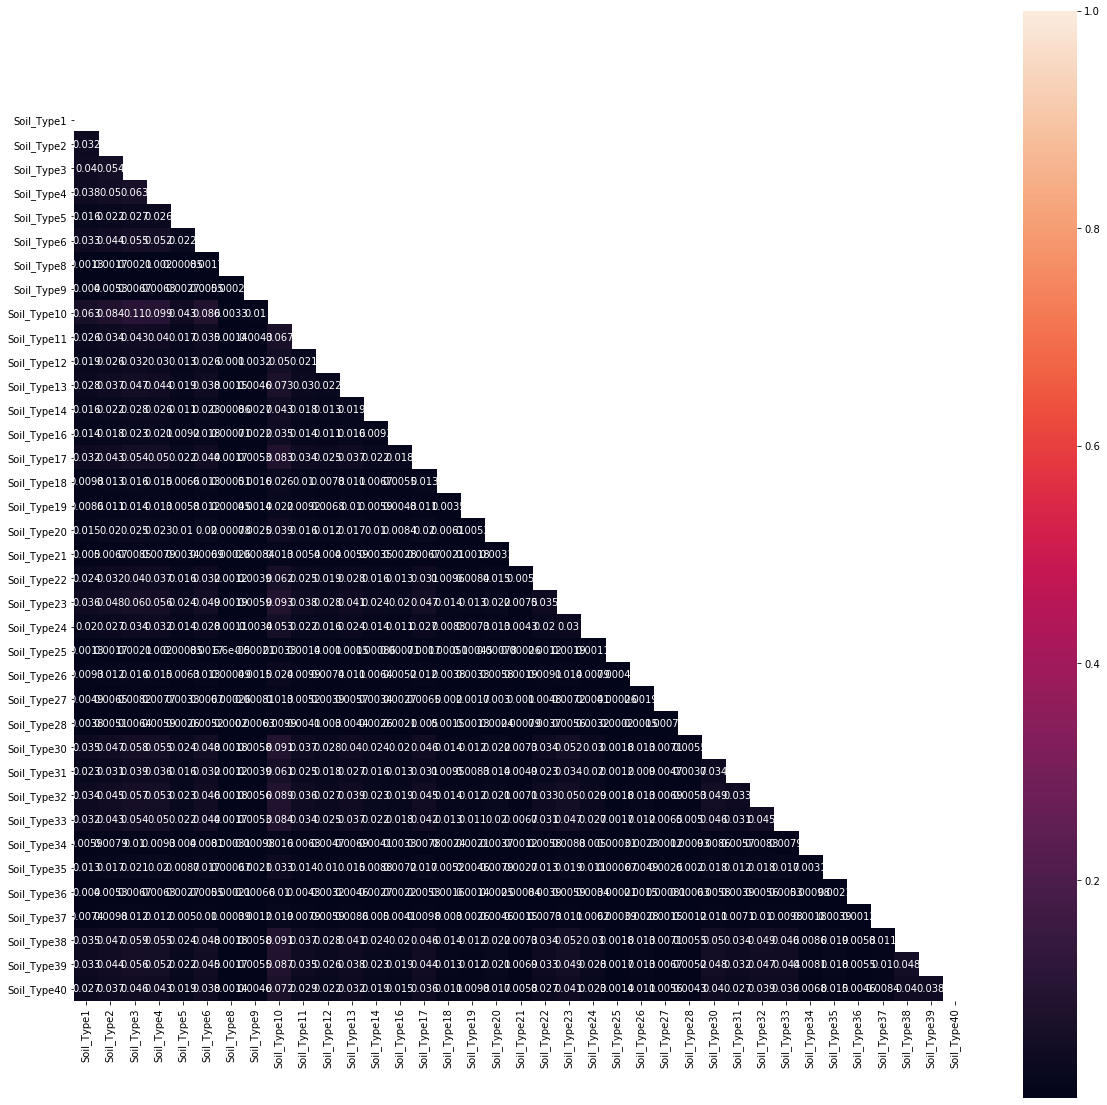

In [20]:
mask = np.zeros_like(train_data[soil_columns].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(data=abs(train_data[soil_columns].corr()), annot=True, square=True, mask=mask)

In [21]:
soil_abs_correlation = train_data[soil_columns].corr().abs()
masked_soil_abs_correlation = soil_abs_correlation.mask(mask).unstack()
masked_soil_abs_correlation.loc[masked_soil_abs_correlation.notnull()].sort_values(ascending=False).head()

Soil_Type3   Soil_Type10    0.105899
Soil_Type4   Soil_Type10    0.098719
Soil_Type10  Soil_Type23    0.093268
             Soil_Type38    0.091372
             Soil_Type30    0.091174
dtype: float64

## Getting the right subset of columns

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [23]:
target_data = train_data['Cover_Type'].copy()
target_data = target_data - 1
display(target_data.min())
display(target_data.max())

0

6

In [24]:
other_columns.remove('Cover_Type')

In [25]:
target_one_hot = to_categorical(target_data)
display(target_one_hot)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [26]:
feature_subset = len(other_columns)
display(feature_subset)

9

In [27]:
model_feat_selection = Sequential()

In [28]:
model_feat_selection.add(Dense(7, input_dim = feature_subset, activation='softmax'))

In [29]:
model_feat_selection.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_feat_selection.fit(train_data[other_columns].values, target_one_hot, epochs=10000, verbose = 1, batch_size=32)

Train on 15120 samples
Epoch 1/10000
15120/15120 [==============================] - 1s 61us/sample - loss: 425.7722 - accuracy: 0.1645
Epoch 2/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 116.4335 - accuracy: 0.1693
Epoch 3/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 27.4636 - accuracy: 0.2093
Epoch 4/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 11.3509 - accuracy: 0.2356
Epoch 5/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 3.3377 - accuracy: 0.2769
Epoch 6/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 2.3892 - accuracy: 0.3000
Epoch 7/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.9785 - accuracy: 0.3157
Epoch 8/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.7772 - accuracy: 0.3309
Epoch 9/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.7034 

15120/15120 [==============================] - 1s 33us/sample - loss: 1.5460 - accuracy: 0.3843
Epoch 75/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.5652 - accuracy: 0.3849
Epoch 76/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4890 - accuracy: 0.3882
Epoch 77/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.5588 - accuracy: 0.3867
Epoch 78/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4622 - accuracy: 0.3911
Epoch 79/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.5453 - accuracy: 0.3886
Epoch 80/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.5481 - accuracy: 0.3885
Epoch 81/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.5495 - accuracy: 0.3883
Epoch 82/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4722 - accuracy: 0.4013
Epoch 83/10000
1

15120/15120 [==============================] - 1s 36us/sample - loss: 1.4363 - accuracy: 0.4192
Epoch 147/10000
15120/15120 [==============================] - 1s 45us/sample - loss: 1.4345 - accuracy: 0.4181
Epoch 148/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4808 - accuracy: 0.4093
Epoch 149/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.4588 - accuracy: 0.4122
Epoch 150/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.4901 - accuracy: 0.4123
Epoch 151/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.4361 - accuracy: 0.4207
Epoch 152/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4299 - accuracy: 0.4185
Epoch 153/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.4273 - accuracy: 0.4178
Epoch 154/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.4892 - accuracy: 0.4103
Epoch 15

15120/15120 [==============================] - 0s 32us/sample - loss: 1.3790 - accuracy: 0.4345
Epoch 220/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4217 - accuracy: 0.4198
Epoch 221/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.4380 - accuracy: 0.4182
Epoch 222/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4236 - accuracy: 0.4318
Epoch 223/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4104 - accuracy: 0.4280
Epoch 224/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4278 - accuracy: 0.4294
Epoch 225/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3772 - accuracy: 0.4356
Epoch 226/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4236 - accuracy: 0.4290
Epoch 227/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4217 - accuracy: 0.4265
Epoch 22

15120/15120 [==============================] - 0s 32us/sample - loss: 1.4573 - accuracy: 0.4339
Epoch 293/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3326 - accuracy: 0.4492
Epoch 294/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3515 - accuracy: 0.4428
Epoch 295/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.4262 - accuracy: 0.4352
Epoch 296/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.3866 - accuracy: 0.4441
Epoch 297/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.3729 - accuracy: 0.4469
Epoch 298/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3062 - accuracy: 0.4571
Epoch 299/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3832 - accuracy: 0.4461
Epoch 300/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3191 - accuracy: 0.4487
Epoch 30

15120/15120 [==============================] - 0s 32us/sample - loss: 1.3621 - accuracy: 0.4460
Epoch 366/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.3737 - accuracy: 0.4424
Epoch 367/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3641 - accuracy: 0.4432
Epoch 368/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.3029 - accuracy: 0.4509
Epoch 369/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3826 - accuracy: 0.4418
Epoch 370/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3146 - accuracy: 0.4508
Epoch 371/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3378 - accuracy: 0.4519
Epoch 372/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3512 - accuracy: 0.4495
Epoch 373/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.3984 - accuracy: 0.4386
Epoch 37

15120/15120 [==============================] - 1s 34us/sample - loss: 1.2981 - accuracy: 0.4556
Epoch 438/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.3375 - accuracy: 0.4513
Epoch 439/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3492 - accuracy: 0.4540
Epoch 440/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3294 - accuracy: 0.4518
Epoch 441/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3375 - accuracy: 0.4542
Epoch 442/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3277 - accuracy: 0.4551
Epoch 443/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3383 - accuracy: 0.4534
Epoch 444/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3954 - accuracy: 0.4465
Epoch 445/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.3235 - accuracy: 0.4546
Epoch 44

15120/15120 [==============================] - 0s 32us/sample - loss: 1.3375 - accuracy: 0.4575
Epoch 511/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.3532 - accuracy: 0.4622
Epoch 512/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.3412 - accuracy: 0.4560
Epoch 513/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.3661 - accuracy: 0.4552
Epoch 514/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3337 - accuracy: 0.4555
Epoch 515/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3579 - accuracy: 0.4520
Epoch 516/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3086 - accuracy: 0.4656
Epoch 517/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3106 - accuracy: 0.4629
Epoch 518/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.3151 - accuracy: 0.4592
Epoch 51

15120/15120 [==============================] - 0s 32us/sample - loss: 1.2526 - accuracy: 0.4791
Epoch 584/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3233 - accuracy: 0.4623
Epoch 585/10000
15120/15120 [==============================] - 1s 45us/sample - loss: 1.3475 - accuracy: 0.4625
Epoch 586/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2792 - accuracy: 0.4668
Epoch 587/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.3543 - accuracy: 0.4608
Epoch 588/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2742 - accuracy: 0.4731
Epoch 589/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3098 - accuracy: 0.4692
Epoch 590/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.3021 - accuracy: 0.4566
Epoch 591/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2805 - accuracy: 0.4704
Epoch 59

15120/15120 [==============================] - 1s 36us/sample - loss: 1.3224 - accuracy: 0.4656
Epoch 657/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3265 - accuracy: 0.4663
Epoch 658/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2767 - accuracy: 0.4704
Epoch 659/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2815 - accuracy: 0.4763
Epoch 660/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3010 - accuracy: 0.4700
Epoch 661/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2895 - accuracy: 0.4716
Epoch 662/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3098 - accuracy: 0.4665
Epoch 663/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2535 - accuracy: 0.4731
Epoch 664/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.3529 - accuracy: 0.4599
Epoch 66

15120/15120 [==============================] - 1s 36us/sample - loss: 1.2919 - accuracy: 0.4696
Epoch 730/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3160 - accuracy: 0.4731
Epoch 731/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.3025 - accuracy: 0.4655
Epoch 732/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2932 - accuracy: 0.4654
Epoch 733/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2481 - accuracy: 0.4770
Epoch 734/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2580 - accuracy: 0.4756
Epoch 735/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2501 - accuracy: 0.4811
Epoch 736/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2717 - accuracy: 0.4729
Epoch 737/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2842 - accuracy: 0.4745
Epoch 73

15120/15120 [==============================] - 1s 36us/sample - loss: 1.2822 - accuracy: 0.4778
Epoch 803/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3072 - accuracy: 0.4758
Epoch 804/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2594 - accuracy: 0.4845
Epoch 805/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2689 - accuracy: 0.4798
Epoch 806/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2351 - accuracy: 0.4832
Epoch 807/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2608 - accuracy: 0.4786
Epoch 808/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2350 - accuracy: 0.4788
Epoch 809/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2516 - accuracy: 0.4778
Epoch 810/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3286 - accuracy: 0.4637
Epoch 81

15120/15120 [==============================] - 1s 35us/sample - loss: 1.2633 - accuracy: 0.4759
Epoch 876/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2368 - accuracy: 0.4866
Epoch 877/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2521 - accuracy: 0.4815
Epoch 878/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2741 - accuracy: 0.4775s - loss: 1.2603 - accura
Epoch 879/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2672 - accuracy: 0.4774
Epoch 880/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2724 - accuracy: 0.4750
Epoch 881/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2459 - accuracy: 0.4812
Epoch 882/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2408 - accuracy: 0.4897
Epoch 883/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3146 - 

15120/15120 [==============================] - 1s 36us/sample - loss: 1.2584 - accuracy: 0.4843
Epoch 948/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.3334 - accuracy: 0.4747
Epoch 949/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2590 - accuracy: 0.4792
Epoch 950/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2274 - accuracy: 0.4884
Epoch 951/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2928 - accuracy: 0.4816
Epoch 952/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2191 - accuracy: 0.4890
Epoch 953/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3468 - accuracy: 0.4664
Epoch 954/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1967 - accuracy: 0.4956
Epoch 955/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.3040 - accuracy: 0.4722
Epoch 95

15120/15120 [==============================] - 1s 36us/sample - loss: 1.2681 - accuracy: 0.4917
Epoch 1021/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1896 - accuracy: 0.4999
Epoch 1022/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2489 - accuracy: 0.4864
Epoch 1023/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2534 - accuracy: 0.4813
Epoch 1024/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2823 - accuracy: 0.4812
Epoch 1025/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2810 - accuracy: 0.4778
Epoch 1026/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1863 - accuracy: 0.4918
Epoch 1027/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2644 - accuracy: 0.4896
Epoch 1028/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2585 - accuracy: 0.4825


15120/15120 [==============================] - 1s 39us/sample - loss: 1.3022 - accuracy: 0.4772
Epoch 1093/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2515 - accuracy: 0.4888
Epoch 1094/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2172 - accuracy: 0.4962
Epoch 1095/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2508 - accuracy: 0.4828
Epoch 1096/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2309 - accuracy: 0.4868
Epoch 1097/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2621 - accuracy: 0.4842
Epoch 1098/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2599 - accuracy: 0.4829
Epoch 1099/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2416 - accuracy: 0.4830
Epoch 1100/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2854 - accuracy: 0.4819


15120/15120 [==============================] - 1s 36us/sample - loss: 1.2940 - accuracy: 0.4767
Epoch 1165/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2590 - accuracy: 0.4845
Epoch 1166/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2442 - accuracy: 0.4853
Epoch 1167/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2940 - accuracy: 0.4890
Epoch 1168/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2335 - accuracy: 0.4956
Epoch 1169/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2647 - accuracy: 0.4893
Epoch 1170/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2352 - accuracy: 0.4827
Epoch 1171/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2730 - accuracy: 0.4905
Epoch 1172/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2449 - accuracy: 0.4950


15120/15120 [==============================] - 1s 38us/sample - loss: 1.2004 - accuracy: 0.4983
Epoch 1237/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2460 - accuracy: 0.4921
Epoch 1238/10000
15120/15120 [==============================] - 1s 43us/sample - loss: 1.3135 - accuracy: 0.4782
Epoch 1239/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2696 - accuracy: 0.4906
Epoch 1240/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2350 - accuracy: 0.4933
Epoch 1241/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2049 - accuracy: 0.4943
Epoch 1242/10000
15120/15120 [==============================] - 1s 40us/sample - loss: 1.2764 - accuracy: 0.4854
Epoch 1243/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2059 - accuracy: 0.4926
Epoch 1244/10000
15120/15120 [==============================] - 1s 40us/sample - loss: 1.2737 - accuracy: 0.4826


15120/15120 [==============================] - 1s 36us/sample - loss: 1.2549 - accuracy: 0.4911
Epoch 1309/10000
15120/15120 [==============================] - 1s 42us/sample - loss: 1.2136 - accuracy: 0.4988
Epoch 1310/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2602 - accuracy: 0.4878
Epoch 1311/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2612 - accuracy: 0.4899
Epoch 1312/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2831 - accuracy: 0.4902
Epoch 1313/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2486 - accuracy: 0.4853
Epoch 1314/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2852 - accuracy: 0.4842
Epoch 1315/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2877 - accuracy: 0.4847
Epoch 1316/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2572 - accuracy: 0.4963


15120/15120 [==============================] - 1s 37us/sample - loss: 1.2146 - accuracy: 0.4959
Epoch 1380/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1976 - accuracy: 0.4972
Epoch 1381/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2652 - accuracy: 0.4878
Epoch 1382/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2612 - accuracy: 0.4874
Epoch 1383/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2375 - accuracy: 0.4917
Epoch 1384/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2321 - accuracy: 0.4931
Epoch 1385/10000
15120/15120 [==============================] - 1s 42us/sample - loss: 1.3393 - accuracy: 0.4751
Epoch 1386/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2103 - accuracy: 0.5047
Epoch 1387/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2570 - accuracy: 0.4948


15120/15120 [==============================] - 1s 36us/sample - loss: 1.2501 - accuracy: 0.4894s - loss: 1.2932 
Epoch 1452/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2171 - accuracy: 0.4955
Epoch 1453/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1787 - accuracy: 0.5001
Epoch 1454/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2199 - accuracy: 0.4910
Epoch 1455/10000
15120/15120 [==============================] - 1s 40us/sample - loss: 1.2024 - accuracy: 0.4989
Epoch 1456/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.3085 - accuracy: 0.4821
Epoch 1457/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2584 - accuracy: 0.4918
Epoch 1458/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2029 - accuracy: 0.4962
Epoch 1459/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1874 - 

15120/15120 [==============================] - 1s 37us/sample - loss: 1.2242 - accuracy: 0.5012
Epoch 1524/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2487 - accuracy: 0.4870s - loss: 1.2468 - accura
Epoch 1525/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2164 - accuracy: 0.4970
Epoch 1526/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2413 - accuracy: 0.4945
Epoch 1527/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2085 - accuracy: 0.5003
Epoch 1528/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2461 - accuracy: 0.4944
Epoch 1529/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2621 - accuracy: 0.4888
Epoch 1530/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2520 - accuracy: 0.4912
Epoch 1531/10000
15120/15120 [==============================] - 1s 42us/sample - loss: 1

15120/15120 [==============================] - 1s 36us/sample - loss: 1.2695 - accuracy: 0.4897
Epoch 1596/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.3020 - accuracy: 0.4882
Epoch 1597/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2324 - accuracy: 0.5020
Epoch 1598/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2085 - accuracy: 0.4991
Epoch 1599/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2074 - accuracy: 0.5006
Epoch 1600/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2665 - accuracy: 0.4854
Epoch 1601/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2397 - accuracy: 0.4979
Epoch 1602/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.1820 - accuracy: 0.5056
Epoch 1603/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2780 - accuracy: 0.4988


15120/15120 [==============================] - 1s 36us/sample - loss: 1.2611 - accuracy: 0.4966
Epoch 1668/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1983 - accuracy: 0.5032
Epoch 1669/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2222 - accuracy: 0.5006
Epoch 1670/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2770 - accuracy: 0.4863
Epoch 1671/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2000 - accuracy: 0.4964
Epoch 1672/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2237 - accuracy: 0.5052
Epoch 1673/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.2184 - accuracy: 0.5036
Epoch 1674/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2344 - accuracy: 0.5020
Epoch 1675/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2069 - accuracy: 0.5028


15120/15120 [==============================] - 1s 39us/sample - loss: 1.2699 - accuracy: 0.4915
Epoch 1740/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2603 - accuracy: 0.4911
Epoch 1741/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2299 - accuracy: 0.4962
Epoch 1742/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2060 - accuracy: 0.5038
Epoch 1743/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2509 - accuracy: 0.4927
Epoch 1744/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2946 - accuracy: 0.4905
Epoch 1745/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1732 - accuracy: 0.5056
Epoch 1746/10000
15120/15120 [==============================] - 1s 40us/sample - loss: 1.2212 - accuracy: 0.4941
Epoch 1747/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1537 - accuracy: 0.5122


15120/15120 [==============================] - 1s 37us/sample - loss: 1.2855 - accuracy: 0.4926
Epoch 1812/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2093 - accuracy: 0.5049
Epoch 1813/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2582 - accuracy: 0.4940
Epoch 1814/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2145 - accuracy: 0.5019
Epoch 1815/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2236 - accuracy: 0.5013
Epoch 1816/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1730 - accuracy: 0.5056
Epoch 1817/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2528 - accuracy: 0.4942
Epoch 1818/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1921 - accuracy: 0.5050
Epoch 1819/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2393 - accuracy: 0.4997


15120/15120 [==============================] - 1s 35us/sample - loss: 1.2157 - accuracy: 0.5017
Epoch 1884/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2533 - accuracy: 0.4983
Epoch 1885/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2279 - accuracy: 0.4996
Epoch 1886/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2393 - accuracy: 0.5024
Epoch 1887/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.2670 - accuracy: 0.4935
Epoch 1888/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1771 - accuracy: 0.5103
Epoch 1889/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2398 - accuracy: 0.5003
Epoch 1890/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2682 - accuracy: 0.4897
Epoch 1891/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2231 - accuracy: 0.5042


15120/15120 [==============================] - 1s 35us/sample - loss: 1.2393 - accuracy: 0.5021
Epoch 1956/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2383 - accuracy: 0.4918
Epoch 1957/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2905 - accuracy: 0.4948
Epoch 1958/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2072 - accuracy: 0.5061
Epoch 1959/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1825 - accuracy: 0.5068
Epoch 1960/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2248 - accuracy: 0.5070s - loss: 1.1968 - accu
Epoch 1961/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2234 - accuracy: 0.5023
Epoch 1962/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2497 - accuracy: 0.4978
Epoch 1963/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2

15120/15120 [==============================] - 1s 34us/sample - loss: 1.2003 - accuracy: 0.5077
Epoch 2028/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2242 - accuracy: 0.5028
Epoch 2029/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2216 - accuracy: 0.5026
Epoch 2030/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2346 - accuracy: 0.4986
Epoch 2031/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.1759 - accuracy: 0.5110
Epoch 2032/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.3066 - accuracy: 0.4934
Epoch 2033/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1736 - accuracy: 0.5108
Epoch 2034/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2132 - accuracy: 0.5075s - loss: 1.2221 - accuracy: 0.
Epoch 2035/10000
15120/15120 [==============================] - 1s 34us/sample - l

15120/15120 [==============================] - 1s 34us/sample - loss: 1.1772 - accuracy: 0.5065
Epoch 2100/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2709 - accuracy: 0.4983
Epoch 2101/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.3008 - accuracy: 0.5009
Epoch 2102/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2104 - accuracy: 0.5019
Epoch 2103/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.1719 - accuracy: 0.5086
Epoch 2104/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2983 - accuracy: 0.4938
Epoch 2105/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2045 - accuracy: 0.5057
Epoch 2106/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2072 - accuracy: 0.5104
Epoch 2107/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2057 - accuracy: 0.5087


15120/15120 [==============================] - 1s 33us/sample - loss: 1.2239 - accuracy: 0.5049
Epoch 2172/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2268 - accuracy: 0.4989
Epoch 2173/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2500 - accuracy: 0.4985
Epoch 2174/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2006 - accuracy: 0.5133
Epoch 2175/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1918 - accuracy: 0.5093
Epoch 2176/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2602 - accuracy: 0.5041
Epoch 2177/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1960 - accuracy: 0.5081
Epoch 2178/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2505 - accuracy: 0.4976
Epoch 2179/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2121 - accuracy: 0.4994


15120/15120 [==============================] - 1s 36us/sample - loss: 1.2620 - accuracy: 0.4932
Epoch 2244/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2215 - accuracy: 0.5075
Epoch 2245/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1501 - accuracy: 0.5160
Epoch 2246/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2439 - accuracy: 0.5022
Epoch 2247/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2807 - accuracy: 0.5015
Epoch 2248/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2471 - accuracy: 0.4991
Epoch 2249/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1880 - accuracy: 0.5089
Epoch 2250/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2021 - accuracy: 0.5073
Epoch 2251/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2358 - accuracy: 0.4986


15120/15120 [==============================] - 1s 34us/sample - loss: 1.2053 - accuracy: 0.5097
Epoch 2316/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2404 - accuracy: 0.4994
Epoch 2317/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2651 - accuracy: 0.5038
Epoch 2318/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1775 - accuracy: 0.5080
Epoch 2319/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2205 - accuracy: 0.5039
Epoch 2320/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2731 - accuracy: 0.5014
Epoch 2321/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2215 - accuracy: 0.5036
Epoch 2322/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2091 - accuracy: 0.5000
Epoch 2323/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.1632 - accuracy: 0.5152


15120/15120 [==============================] - 1s 34us/sample - loss: 1.2109 - accuracy: 0.5044
Epoch 2388/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2089 - accuracy: 0.5047
Epoch 2389/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2308 - accuracy: 0.5036
Epoch 2390/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.2286 - accuracy: 0.5072
Epoch 2391/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2254 - accuracy: 0.5085
Epoch 2392/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2187 - accuracy: 0.5126
Epoch 2393/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2033 - accuracy: 0.5095
Epoch 2394/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1943 - accuracy: 0.5179
Epoch 2395/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1800 - accuracy: 0.5212


15120/15120 [==============================] - 1s 34us/sample - loss: 1.2464 - accuracy: 0.5069
Epoch 2460/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1938 - accuracy: 0.5055
Epoch 2461/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2301 - accuracy: 0.5032
Epoch 2462/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.1703 - accuracy: 0.5093
Epoch 2463/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1844 - accuracy: 0.5079
Epoch 2464/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2054 - accuracy: 0.5110
Epoch 2465/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2349 - accuracy: 0.5033
Epoch 2466/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2514 - accuracy: 0.5129
Epoch 2467/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.1715 - accuracy: 0.5214


15120/15120 [==============================] - 1s 34us/sample - loss: 1.2346 - accuracy: 0.5081
Epoch 2531/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1991 - accuracy: 0.5087
Epoch 2532/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2103 - accuracy: 0.5144
Epoch 2533/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2023 - accuracy: 0.5113
Epoch 2534/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2808 - accuracy: 0.5041
Epoch 2535/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2561 - accuracy: 0.5010
Epoch 2536/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1793 - accuracy: 0.5149
Epoch 2537/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2032 - accuracy: 0.5101
Epoch 2538/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2688 - accuracy: 0.5020


15120/15120 [==============================] - 1s 33us/sample - loss: 1.2317 - accuracy: 0.5024
Epoch 2603/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2298 - accuracy: 0.5117
Epoch 2604/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2052 - accuracy: 0.5164
Epoch 2605/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2342 - accuracy: 0.5079
Epoch 2606/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2228 - accuracy: 0.5058
Epoch 2607/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2015 - accuracy: 0.5122
Epoch 2608/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2181 - accuracy: 0.5149
Epoch 2609/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2486 - accuracy: 0.5072
Epoch 2610/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2098 - accuracy: 0.5136


15120/15120 [==============================] - 1s 39us/sample - loss: 1.1960 - accuracy: 0.5085
Epoch 2675/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2131 - accuracy: 0.5055
Epoch 2676/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2238 - accuracy: 0.5073
Epoch 2677/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2556 - accuracy: 0.5047
Epoch 2678/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1850 - accuracy: 0.5105
Epoch 2679/10000
15120/15120 [==============================] - 1s 40us/sample - loss: 1.2028 - accuracy: 0.5092
Epoch 2680/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2006 - accuracy: 0.5116
Epoch 2681/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1928 - accuracy: 0.5134s - loss: 1.1564 - accu
Epoch 2682/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2

15120/15120 [==============================] - 1s 41us/sample - loss: 1.1728 - accuracy: 0.5179
Epoch 2747/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2381 - accuracy: 0.5037
Epoch 2748/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1880 - accuracy: 0.5115
Epoch 2749/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2721 - accuracy: 0.4966
Epoch 2750/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2282 - accuracy: 0.5048
Epoch 2751/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2619 - accuracy: 0.5087
Epoch 2752/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2303 - accuracy: 0.5114
Epoch 2753/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.1820 - accuracy: 0.5134
Epoch 2754/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.3138 - accuracy: 0.4952


15120/15120 [==============================] - 1s 37us/sample - loss: 1.1710 - accuracy: 0.5177
Epoch 2819/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1629 - accuracy: 0.5201
Epoch 2820/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1838 - accuracy: 0.5130
Epoch 2821/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2370 - accuracy: 0.5089
Epoch 2822/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1764 - accuracy: 0.5159
Epoch 2823/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1882 - accuracy: 0.5140
Epoch 2824/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2710 - accuracy: 0.5015
Epoch 2825/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.2502 - accuracy: 0.5085
Epoch 2826/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2431 - accuracy: 0.5077


15120/15120 [==============================] - 1s 37us/sample - loss: 1.2370 - accuracy: 0.5144
Epoch 2891/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1820 - accuracy: 0.5148
Epoch 2892/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2413 - accuracy: 0.5120
Epoch 2893/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.2274 - accuracy: 0.5091
Epoch 2894/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1895 - accuracy: 0.5147
Epoch 2895/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2857 - accuracy: 0.5020
Epoch 2896/10000
15120/15120 [==============================] - 1s 40us/sample - loss: 1.1930 - accuracy: 0.5118
Epoch 2897/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1776 - accuracy: 0.5188
Epoch 2898/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2039 - accuracy: 0.5032


15120/15120 [==============================] - 1s 40us/sample - loss: 1.1833 - accuracy: 0.5147
Epoch 2963/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2215 - accuracy: 0.5058
Epoch 2964/10000
15120/15120 [==============================] - 1s 42us/sample - loss: 1.2077 - accuracy: 0.5161
Epoch 2965/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1745 - accuracy: 0.5202
Epoch 2966/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1852 - accuracy: 0.5166
Epoch 2967/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1871 - accuracy: 0.5139
Epoch 2968/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2099 - accuracy: 0.5088
Epoch 2969/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2628 - accuracy: 0.5060
Epoch 2970/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1823 - accuracy: 0.5125


15120/15120 [==============================] - 1s 37us/sample - loss: 1.2494 - accuracy: 0.5101
Epoch 3035/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2201 - accuracy: 0.5108
Epoch 3036/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.2101 - accuracy: 0.5129
Epoch 3037/10000
15120/15120 [==============================] - 1s 40us/sample - loss: 1.1528 - accuracy: 0.5164
Epoch 3038/10000
15120/15120 [==============================] - 1s 42us/sample - loss: 1.2834 - accuracy: 0.5048
Epoch 3039/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1722 - accuracy: 0.5212
Epoch 3040/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2594 - accuracy: 0.5090
Epoch 3041/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2616 - accuracy: 0.5148
Epoch 3042/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1815 - accuracy: 0.5204


15120/15120 [==============================] - 1s 37us/sample - loss: 1.2088 - accuracy: 0.5133
Epoch 3107/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2078 - accuracy: 0.5120
Epoch 3108/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2032 - accuracy: 0.5129
Epoch 3109/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2148 - accuracy: 0.5046
Epoch 3110/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1722 - accuracy: 0.5195
Epoch 3111/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2318 - accuracy: 0.5086
Epoch 3112/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2355 - accuracy: 0.5120
Epoch 3113/10000
15120/15120 [==============================] - 1s 41us/sample - loss: 1.2573 - accuracy: 0.5072
Epoch 3114/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1727 - accuracy: 0.5192


15120/15120 [==============================] - 1s 44us/sample - loss: 1.2055 - accuracy: 0.5142
Epoch 3179/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1822 - accuracy: 0.5194
Epoch 3180/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2603 - accuracy: 0.5020
Epoch 3181/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2639 - accuracy: 0.5040
Epoch 3182/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2144 - accuracy: 0.5126
Epoch 3183/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2181 - accuracy: 0.5111
Epoch 3184/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2583 - accuracy: 0.5081
Epoch 3185/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1896 - accuracy: 0.5108
Epoch 3186/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1950 - accuracy: 0.5109


15120/15120 [==============================] - 1s 36us/sample - loss: 1.2659 - accuracy: 0.5087
Epoch 3251/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1713 - accuracy: 0.5238
Epoch 3252/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1564 - accuracy: 0.5184
Epoch 3253/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.1475 - accuracy: 0.5171
Epoch 3254/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1707 - accuracy: 0.5157
Epoch 3255/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1888 - accuracy: 0.5141
Epoch 3256/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2408 - accuracy: 0.5092
Epoch 3257/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1723 - accuracy: 0.5147
Epoch 3258/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2246 - accuracy: 0.5114


15120/15120 [==============================] - 1s 34us/sample - loss: 1.1659 - accuracy: 0.5237
Epoch 3323/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2070 - accuracy: 0.5139
Epoch 3324/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2656 - accuracy: 0.5073
Epoch 3325/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1657 - accuracy: 0.5247
Epoch 3326/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1771 - accuracy: 0.5167
Epoch 3327/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2150 - accuracy: 0.5067
Epoch 3328/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1726 - accuracy: 0.5165
Epoch 3329/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1939 - accuracy: 0.5156
Epoch 3330/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1966 - accuracy: 0.5093


15120/15120 [==============================] - 0s 32us/sample - loss: 1.1941 - accuracy: 0.5104
Epoch 3394/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2309 - accuracy: 0.5138
Epoch 3395/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2397 - accuracy: 0.5113
Epoch 3396/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1800 - accuracy: 0.5187
Epoch 3397/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1903 - accuracy: 0.5198
Epoch 3398/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1731 - accuracy: 0.5209
Epoch 3399/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1920 - accuracy: 0.5177
Epoch 3400/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2237 - accuracy: 0.5091
Epoch 3401/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2196 - accuracy: 0.5204


15120/15120 [==============================] - 0s 30us/sample - loss: 1.1824 - accuracy: 0.5231
Epoch 3466/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2146 - accuracy: 0.5128
Epoch 3467/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1978 - accuracy: 0.5185
Epoch 3468/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1851 - accuracy: 0.5263
Epoch 3469/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.2311 - accuracy: 0.5092
Epoch 3470/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2677 - accuracy: 0.5083
Epoch 3471/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1779 - accuracy: 0.5163
Epoch 3472/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2260 - accuracy: 0.5106
Epoch 3473/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1993 - accuracy: 0.5122


15120/15120 [==============================] - 1s 34us/sample - loss: 1.2567 - accuracy: 0.5097
Epoch 3538/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2203 - accuracy: 0.5110
Epoch 3539/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2014 - accuracy: 0.5128
Epoch 3540/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2397 - accuracy: 0.5154
Epoch 3541/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2432 - accuracy: 0.5112
Epoch 3542/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1777 - accuracy: 0.5217
Epoch 3543/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2241 - accuracy: 0.5182
Epoch 3544/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2046 - accuracy: 0.5194s - loss: 1.2177 - accuracy: 0.
Epoch 3545/10000
15120/15120 [==============================] - 0s 32us/sample - l

15120/15120 [==============================] - 0s 30us/sample - loss: 1.1798 - accuracy: 0.5166
Epoch 3610/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1752 - accuracy: 0.5198
Epoch 3611/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2506 - accuracy: 0.5095
Epoch 3612/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2745 - accuracy: 0.5089
Epoch 3613/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2171 - accuracy: 0.5155
Epoch 3614/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2347 - accuracy: 0.5122
Epoch 3615/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2244 - accuracy: 0.5140
Epoch 3616/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1540 - accuracy: 0.5259
Epoch 3617/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2084 - accuracy: 0.5140


15120/15120 [==============================] - 0s 32us/sample - loss: 1.1995 - accuracy: 0.5220
Epoch 3682/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2274 - accuracy: 0.5103
Epoch 3683/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2209 - accuracy: 0.5086
Epoch 3684/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2220 - accuracy: 0.5136
Epoch 3685/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1941 - accuracy: 0.5181s - loss: 1.2041 - accuracy: 0.
Epoch 3686/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2172 - accuracy: 0.5145
Epoch 3687/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1841 - accuracy: 0.5095
Epoch 3688/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2426 - accuracy: 0.5183
Epoch 3689/10000
15120/15120 [==============================] - 0s 33us/sample - l

15120/15120 [==============================] - 0s 30us/sample - loss: 1.2211 - accuracy: 0.5219
Epoch 3754/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2811 - accuracy: 0.5076
Epoch 3755/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1279 - accuracy: 0.5246
Epoch 3756/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2195 - accuracy: 0.5096
Epoch 3757/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2035 - accuracy: 0.5109
Epoch 3758/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2220 - accuracy: 0.5077
Epoch 3759/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2458 - accuracy: 0.5132
Epoch 3760/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2234 - accuracy: 0.5168
Epoch 3761/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1916 - accuracy: 0.5187


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2226 - accuracy: 0.5165
Epoch 3826/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1895 - accuracy: 0.5173
Epoch 3827/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2315 - accuracy: 0.5146
Epoch 3828/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2197 - accuracy: 0.5181
Epoch 3829/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2207 - accuracy: 0.5144
Epoch 3830/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1702 - accuracy: 0.5226
Epoch 3831/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2091 - accuracy: 0.5162
Epoch 3832/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2028 - accuracy: 0.5119
Epoch 3833/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2387 - accuracy: 0.5149


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2003 - accuracy: 0.5134
Epoch 3897/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2141 - accuracy: 0.5188
Epoch 3898/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2088 - accuracy: 0.5132
Epoch 3899/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2332 - accuracy: 0.5083
Epoch 3900/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1981 - accuracy: 0.5181
Epoch 3901/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1512 - accuracy: 0.5189
Epoch 3902/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2396 - accuracy: 0.5056
Epoch 3903/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2039 - accuracy: 0.5157
Epoch 3904/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2107 - accuracy: 0.5173


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2318 - accuracy: 0.5167
Epoch 3969/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2203 - accuracy: 0.5172
Epoch 3970/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2249 - accuracy: 0.5130
Epoch 3971/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2168 - accuracy: 0.5166
Epoch 3972/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1913 - accuracy: 0.5175
Epoch 3973/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2354 - accuracy: 0.5081
Epoch 3974/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1922 - accuracy: 0.5187
Epoch 3975/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2424 - accuracy: 0.5120
Epoch 3976/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1536 - accuracy: 0.5276


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2250 - accuracy: 0.5200
Epoch 4041/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2526 - accuracy: 0.5097
Epoch 4042/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2403 - accuracy: 0.5104
Epoch 4043/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2049 - accuracy: 0.5190
Epoch 4044/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1853 - accuracy: 0.5182
Epoch 4045/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2081 - accuracy: 0.5140
Epoch 4046/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2770 - accuracy: 0.5021
Epoch 4047/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2884 - accuracy: 0.5066
Epoch 4048/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.1386 - accuracy: 0.5274


15120/15120 [==============================] - 0s 31us/sample - loss: 1.1618 - accuracy: 0.5248
Epoch 4113/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1988 - accuracy: 0.5172
Epoch 4114/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2430 - accuracy: 0.5067
Epoch 4115/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1785 - accuracy: 0.5149
Epoch 4116/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2235 - accuracy: 0.5183
Epoch 4117/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2521 - accuracy: 0.5084
Epoch 4118/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1762 - accuracy: 0.5267
Epoch 4119/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1428 - accuracy: 0.5251
Epoch 4120/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1828 - accuracy: 0.5179


15120/15120 [==============================] - 0s 31us/sample - loss: 1.1662 - accuracy: 0.5222
Epoch 4185/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2175 - accuracy: 0.5159
Epoch 4186/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1478 - accuracy: 0.5245
Epoch 4187/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2400 - accuracy: 0.5139
Epoch 4188/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2123 - accuracy: 0.5189
Epoch 4189/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2635 - accuracy: 0.5122
Epoch 4190/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2173 - accuracy: 0.5092
Epoch 4191/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1962 - accuracy: 0.5165
Epoch 4192/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1677 - accuracy: 0.5209


15120/15120 [==============================] - 0s 31us/sample - loss: 1.1922 - accuracy: 0.5266
Epoch 4256/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1889 - accuracy: 0.5192
Epoch 4257/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2367 - accuracy: 0.5173
Epoch 4258/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1806 - accuracy: 0.5187
Epoch 4259/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1738 - accuracy: 0.5192
Epoch 4260/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2355 - accuracy: 0.5065
Epoch 4261/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1451 - accuracy: 0.5274
Epoch 4262/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2020 - accuracy: 0.5173
Epoch 4263/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2421 - accuracy: 0.5136


15120/15120 [==============================] - 0s 31us/sample - loss: 1.1731 - accuracy: 0.5244
Epoch 4328/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2489 - accuracy: 0.5118
Epoch 4329/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2366 - accuracy: 0.5184
Epoch 4330/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2027 - accuracy: 0.5222
Epoch 4331/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1647 - accuracy: 0.5187
Epoch 4332/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1990 - accuracy: 0.5202
Epoch 4333/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2436 - accuracy: 0.5208
Epoch 4334/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2379 - accuracy: 0.5174
Epoch 4335/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1634 - accuracy: 0.5249


15120/15120 [==============================] - 0s 30us/sample - loss: 1.1850 - accuracy: 0.5196
Epoch 4400/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1914 - accuracy: 0.5253
Epoch 4401/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1928 - accuracy: 0.5257
Epoch 4402/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1849 - accuracy: 0.5192
Epoch 4403/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.2298 - accuracy: 0.5183
Epoch 4404/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1454 - accuracy: 0.5262
Epoch 4405/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2270 - accuracy: 0.5173
Epoch 4406/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1892 - accuracy: 0.5188
Epoch 4407/10000
15120/15120 [==============================] - 1s 33us/sample - loss: 1.1940 - accuracy: 0.5168


15120/15120 [==============================] - 0s 30us/sample - loss: 1.2629 - accuracy: 0.5118
Epoch 4472/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1823 - accuracy: 0.5251
Epoch 4473/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2147 - accuracy: 0.5189
Epoch 4474/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1906 - accuracy: 0.5245
Epoch 4475/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2381 - accuracy: 0.5206
Epoch 4476/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1535 - accuracy: 0.5235
Epoch 4477/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2563 - accuracy: 0.5044
Epoch 4478/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2317 - accuracy: 0.5139
Epoch 4479/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1749 - accuracy: 0.5244


15120/15120 [==============================] - 0s 31us/sample - loss: 1.1735 - accuracy: 0.5292
Epoch 4544/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2020 - accuracy: 0.5212
Epoch 4545/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2398 - accuracy: 0.5130
Epoch 4546/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1293 - accuracy: 0.5276
Epoch 4547/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2519 - accuracy: 0.5102
Epoch 4548/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2475 - accuracy: 0.5126
Epoch 4549/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1214 - accuracy: 0.5281
Epoch 4550/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2259 - accuracy: 0.5175
Epoch 4551/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1762 - accuracy: 0.5165


15120/15120 [==============================] - 0s 31us/sample - loss: 1.1518 - accuracy: 0.5227
Epoch 4616/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1451 - accuracy: 0.5306
Epoch 4617/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1713 - accuracy: 0.5263
Epoch 4618/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2110 - accuracy: 0.5301
Epoch 4619/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2433 - accuracy: 0.5151
Epoch 4620/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2397 - accuracy: 0.5155
Epoch 4621/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2159 - accuracy: 0.5146
Epoch 4622/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1985 - accuracy: 0.5228
Epoch 4623/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1904 - accuracy: 0.5199


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2539 - accuracy: 0.5170
Epoch 4688/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1976 - accuracy: 0.5263
Epoch 4689/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2134 - accuracy: 0.5143
Epoch 4690/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2380 - accuracy: 0.5146
Epoch 4691/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1965 - accuracy: 0.5214
Epoch 4692/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1857 - accuracy: 0.5253
Epoch 4693/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2162 - accuracy: 0.5163
Epoch 4694/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1479 - accuracy: 0.5300
Epoch 4695/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1979 - accuracy: 0.5186


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2720 - accuracy: 0.5124
Epoch 4760/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1601 - accuracy: 0.5241
Epoch 4761/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2164 - accuracy: 0.5155
Epoch 4762/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2317 - accuracy: 0.5198
Epoch 4763/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2648 - accuracy: 0.5147
Epoch 4764/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2778 - accuracy: 0.5128
Epoch 4765/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2598 - accuracy: 0.5136
Epoch 4766/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2269 - accuracy: 0.5229
Epoch 4767/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1260 - accuracy: 0.5290


15120/15120 [==============================] - 0s 31us/sample - loss: 1.1868 - accuracy: 0.5231
Epoch 4832/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2275 - accuracy: 0.5188
Epoch 4833/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.3049 - accuracy: 0.5062
Epoch 4834/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1771 - accuracy: 0.5233
Epoch 4835/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1956 - accuracy: 0.5258
Epoch 4836/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2198 - accuracy: 0.5206
Epoch 4837/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2055 - accuracy: 0.5155
Epoch 4838/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2094 - accuracy: 0.5147
Epoch 4839/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2141 - accuracy: 0.5183


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2386 - accuracy: 0.5123
Epoch 4904/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.2002 - accuracy: 0.5214
Epoch 4905/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2119 - accuracy: 0.5216
Epoch 4906/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2082 - accuracy: 0.5178
Epoch 4907/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1524 - accuracy: 0.5310
Epoch 4908/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2572 - accuracy: 0.5092
Epoch 4909/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2223 - accuracy: 0.5162
Epoch 4910/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2869 - accuracy: 0.5151
Epoch 4911/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1968 - accuracy: 0.5200


15120/15120 [==============================] - 1s 33us/sample - loss: 1.1694 - accuracy: 0.5242
Epoch 4976/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1898 - accuracy: 0.5190
Epoch 4977/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2229 - accuracy: 0.5193
Epoch 4978/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2736 - accuracy: 0.5179
Epoch 4979/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1732 - accuracy: 0.5237
Epoch 4980/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2143 - accuracy: 0.5201
Epoch 4981/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2094 - accuracy: 0.5223
Epoch 4982/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1622 - accuracy: 0.5276
Epoch 4983/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2209 - accuracy: 0.5247


15120/15120 [==============================] - 0s 30us/sample - loss: 1.2377 - accuracy: 0.5160
Epoch 5047/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1646 - accuracy: 0.5227
Epoch 5048/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1989 - accuracy: 0.5186s - loss: 1.1646 - accuracy
Epoch 5049/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1980 - accuracy: 0.5188
Epoch 5050/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.2922 - accuracy: 0.5099
Epoch 5051/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2131 - accuracy: 0.5181
Epoch 5052/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2414 - accuracy: 0.5162
Epoch 5053/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1576 - accuracy: 0.5316
Epoch 5054/10000
15120/15120 [==============================] - 0s 31us/sample - loss:

15120/15120 [==============================] - 1s 34us/sample - loss: 1.1719 - accuracy: 0.5310
Epoch 5119/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2046 - accuracy: 0.5253
Epoch 5120/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2487 - accuracy: 0.5182
Epoch 5121/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1726 - accuracy: 0.5271
Epoch 5122/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2127 - accuracy: 0.5200
Epoch 5123/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2038 - accuracy: 0.5220
Epoch 5124/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2314 - accuracy: 0.5176
Epoch 5125/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2177 - accuracy: 0.5255
Epoch 5126/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1659 - accuracy: 0.5274


15120/15120 [==============================] - 0s 32us/sample - loss: 1.1985 - accuracy: 0.5269
Epoch 5190/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2073 - accuracy: 0.5199
Epoch 5191/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2472 - accuracy: 0.5213
Epoch 5192/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1799 - accuracy: 0.5206
Epoch 5193/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1824 - accuracy: 0.5202
Epoch 5194/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2307 - accuracy: 0.5207
Epoch 5195/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1703 - accuracy: 0.5255
Epoch 5196/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2560 - accuracy: 0.5186
Epoch 5197/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2045 - accuracy: 0.5165


15120/15120 [==============================] - 1s 35us/sample - loss: 1.2414 - accuracy: 0.5196
Epoch 5262/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1689 - accuracy: 0.5280
Epoch 5263/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1802 - accuracy: 0.5239
Epoch 5264/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2331 - accuracy: 0.5205
Epoch 5265/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2084 - accuracy: 0.5235
Epoch 5266/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1987 - accuracy: 0.5222
Epoch 5267/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2038 - accuracy: 0.5253
Epoch 5268/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2277 - accuracy: 0.5204
Epoch 5269/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2124 - accuracy: 0.5167


15120/15120 [==============================] - 0s 31us/sample - loss: 1.1694 - accuracy: 0.5308
Epoch 5334/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2032 - accuracy: 0.5269
Epoch 5335/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2821 - accuracy: 0.5153
Epoch 5336/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1900 - accuracy: 0.5210
Epoch 5337/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2151 - accuracy: 0.5247
Epoch 5338/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2336 - accuracy: 0.5175
Epoch 5339/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2464 - accuracy: 0.5196
Epoch 5340/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1936 - accuracy: 0.5180
Epoch 5341/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1989 - accuracy: 0.5187


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2042 - accuracy: 0.5222
Epoch 5405/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1935 - accuracy: 0.5160
Epoch 5406/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1748 - accuracy: 0.5304
Epoch 5407/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2202 - accuracy: 0.5211
Epoch 5408/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2450 - accuracy: 0.5127
Epoch 5409/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2074 - accuracy: 0.5171
Epoch 5410/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2238 - accuracy: 0.5213
Epoch 5411/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1807 - accuracy: 0.5288
Epoch 5412/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2185 - accuracy: 0.5202


15120/15120 [==============================] - 0s 32us/sample - loss: 1.2168 - accuracy: 0.5218
Epoch 5477/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2061 - accuracy: 0.5128
Epoch 5478/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2182 - accuracy: 0.5245
Epoch 5479/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2004 - accuracy: 0.5178
Epoch 5480/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.2360 - accuracy: 0.5192
Epoch 5481/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2558 - accuracy: 0.5139
Epoch 5482/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2060 - accuracy: 0.5245
Epoch 5483/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1943 - accuracy: 0.5186
Epoch 5484/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2496 - accuracy: 0.5198


15120/15120 [==============================] - 0s 30us/sample - loss: 1.2370 - accuracy: 0.5279
Epoch 5549/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2148 - accuracy: 0.5244
Epoch 5550/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2067 - accuracy: 0.5220
Epoch 5551/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1466 - accuracy: 0.5355
Epoch 5552/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2066 - accuracy: 0.5195
Epoch 5553/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1829 - accuracy: 0.5272
Epoch 5554/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.2022 - accuracy: 0.5233
Epoch 5555/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1764 - accuracy: 0.5262
Epoch 5556/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2234 - accuracy: 0.5241


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2380 - accuracy: 0.5157
Epoch 5621/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.2320 - accuracy: 0.5142
Epoch 5622/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1654 - accuracy: 0.5265
Epoch 5623/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1759 - accuracy: 0.5236
Epoch 5624/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2109 - accuracy: 0.5183
Epoch 5625/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2066 - accuracy: 0.5244
Epoch 5626/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2236 - accuracy: 0.5277
Epoch 5627/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2150 - accuracy: 0.5167
Epoch 5628/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2556 - accuracy: 0.5149


15120/15120 [==============================] - 0s 31us/sample - loss: 1.2047 - accuracy: 0.5233
Epoch 5693/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.2252 - accuracy: 0.5202
Epoch 5694/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1946 - accuracy: 0.5253
Epoch 5695/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1856 - accuracy: 0.5261
Epoch 5696/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2061 - accuracy: 0.5214
Epoch 5697/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2313 - accuracy: 0.5140
Epoch 5698/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2436 - accuracy: 0.5249
Epoch 5699/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.3085 - accuracy: 0.5058
Epoch 5700/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1657 - accuracy: 0.5271


15120/15120 [==============================] - 1s 41us/sample - loss: 1.1857 - accuracy: 0.5276
Epoch 5765/10000
15120/15120 [==============================] - 1s 41us/sample - loss: 1.2476 - accuracy: 0.5162
Epoch 5766/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2451 - accuracy: 0.5169
Epoch 5767/10000
15120/15120 [==============================] - 1s 61us/sample - loss: 1.1564 - accuracy: 0.5271
Epoch 5768/10000
15120/15120 [==============================] - 1s 51us/sample - loss: 1.1818 - accuracy: 0.5272
Epoch 5769/10000
15120/15120 [==============================] - 1s 46us/sample - loss: 1.2069 - accuracy: 0.5179
Epoch 5770/10000
15120/15120 [==============================] - 1s 43us/sample - loss: 1.2488 - accuracy: 0.5224
Epoch 5771/10000
15120/15120 [==============================] - 1s 42us/sample - loss: 1.2116 - accuracy: 0.5278
Epoch 5772/10000
15120/15120 [==============================] - 1s 58us/sample - loss: 1.2350 - accuracy: 0.5216


15120/15120 [==============================] - 1s 34us/sample - loss: 1.1783 - accuracy: 0.5256
Epoch 5837/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2333 - accuracy: 0.5211
Epoch 5838/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2233 - accuracy: 0.5180
Epoch 5839/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1932 - accuracy: 0.5266
Epoch 5840/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2516 - accuracy: 0.5138
Epoch 5841/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1913 - accuracy: 0.5288
Epoch 5842/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2670 - accuracy: 0.5173
Epoch 5843/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1980 - accuracy: 0.5242
Epoch 5844/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2410 - accuracy: 0.5200


15120/15120 [==============================] - 1s 35us/sample - loss: 1.1842 - accuracy: 0.5267
Epoch 5909/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2352 - accuracy: 0.5226
Epoch 5910/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2390 - accuracy: 0.5144
Epoch 5911/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.1808 - accuracy: 0.5214
Epoch 5912/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2148 - accuracy: 0.5173
Epoch 5913/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1663 - accuracy: 0.5347
Epoch 5914/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2163 - accuracy: 0.5233
Epoch 5915/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2377 - accuracy: 0.5253
Epoch 5916/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2489 - accuracy: 0.5214


15120/15120 [==============================] - 1s 34us/sample - loss: 1.2078 - accuracy: 0.5205
Epoch 5981/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2111 - accuracy: 0.5232
Epoch 5982/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2199 - accuracy: 0.5208
Epoch 5983/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1981 - accuracy: 0.5259
Epoch 5984/10000
15120/15120 [==============================] - 1s 39us/sample - loss: 1.2070 - accuracy: 0.5306
Epoch 5985/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1916 - accuracy: 0.5242
Epoch 5986/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1786 - accuracy: 0.5272
Epoch 5987/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2184 - accuracy: 0.5192
Epoch 5988/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2340 - accuracy: 0.5268


15120/15120 [==============================] - 1s 35us/sample - loss: 1.2334 - accuracy: 0.5163
Epoch 6053/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.1507 - accuracy: 0.5314
Epoch 6054/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1710 - accuracy: 0.5312
Epoch 6055/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1613 - accuracy: 0.5259
Epoch 6056/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1372 - accuracy: 0.5272
Epoch 6057/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1900 - accuracy: 0.5280
Epoch 6058/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2123 - accuracy: 0.5222
Epoch 6059/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1549 - accuracy: 0.5329
Epoch 6060/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1983 - accuracy: 0.5231


15120/15120 [==============================] - 1s 34us/sample - loss: 1.1859 - accuracy: 0.5218
Epoch 6125/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1661 - accuracy: 0.5234
Epoch 6126/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2571 - accuracy: 0.5175
Epoch 6127/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2021 - accuracy: 0.5191
Epoch 6128/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1947 - accuracy: 0.5194
Epoch 6129/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2920 - accuracy: 0.5089
Epoch 6130/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1999 - accuracy: 0.5233
Epoch 6131/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2042 - accuracy: 0.5251
Epoch 6132/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2405 - accuracy: 0.5212


15120/15120 [==============================] - 1s 35us/sample - loss: 1.1829 - accuracy: 0.5246
Epoch 6197/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2435 - accuracy: 0.5198
Epoch 6198/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1850 - accuracy: 0.5265
Epoch 6199/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1853 - accuracy: 0.5347
Epoch 6200/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1540 - accuracy: 0.5280
Epoch 6201/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2289 - accuracy: 0.5183
Epoch 6202/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1466 - accuracy: 0.5288
Epoch 6203/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2055 - accuracy: 0.5275
Epoch 6204/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1978 - accuracy: 0.5243


15120/15120 [==============================] - 1s 36us/sample - loss: 1.3000 - accuracy: 0.5173
Epoch 6269/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2411 - accuracy: 0.5129
Epoch 6270/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2107 - accuracy: 0.5241
Epoch 6271/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1876 - accuracy: 0.5297
Epoch 6272/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1495 - accuracy: 0.5301
Epoch 6273/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1697 - accuracy: 0.5301
Epoch 6274/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2476 - accuracy: 0.5163
Epoch 6275/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2251 - accuracy: 0.5252
Epoch 6276/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1810 - accuracy: 0.5296


15120/15120 [==============================] - 1s 35us/sample - loss: 1.1470 - accuracy: 0.5324
Epoch 6341/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2706 - accuracy: 0.5184
Epoch 6342/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2522 - accuracy: 0.5156
Epoch 6343/10000
15120/15120 [==============================] - 1s 37us/sample - loss: 1.2436 - accuracy: 0.5173
Epoch 6344/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2410 - accuracy: 0.5215
Epoch 6345/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.2409 - accuracy: 0.5189
Epoch 6346/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1607 - accuracy: 0.5329
Epoch 6347/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.1969 - accuracy: 0.5181
Epoch 6348/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2117 - accuracy: 0.5218


15120/15120 [==============================] - 1s 35us/sample - loss: 1.2035 - accuracy: 0.5255
Epoch 6413/10000
15120/15120 [==============================] - 1s 40us/sample - loss: 1.1914 - accuracy: 0.5269
Epoch 6414/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1752 - accuracy: 0.5245
Epoch 6415/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.1689 - accuracy: 0.5339
Epoch 6416/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2276 - accuracy: 0.5274
Epoch 6417/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2257 - accuracy: 0.5226
Epoch 6418/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.2163 - accuracy: 0.5161
Epoch 6419/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.1675 - accuracy: 0.5313
Epoch 6420/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2545 - accuracy: 0.5135


15120/15120 [==============================] - 0s 33us/sample - loss: 1.2048 - accuracy: 0.5222
Epoch 6485/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.2239 - accuracy: 0.5210
Epoch 6486/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1890 - accuracy: 0.5264
Epoch 6487/10000
15120/15120 [==============================] - 1s 35us/sample - loss: 1.1825 - accuracy: 0.5206
Epoch 6488/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1608 - accuracy: 0.5277
Epoch 6489/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1868 - accuracy: 0.5284
Epoch 6490/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1632 - accuracy: 0.5334s - loss: 1.1515 - accuracy: 0.53
Epoch 6491/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1773 - accuracy: 0.5325
Epoch 6492/10000
15120/15120 [==============================] - 0s 32us/sample -

15120/15120 [==============================] - 0s 32us/sample - loss: 1.1718 - accuracy: 0.5259
Epoch 6556/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2134 - accuracy: 0.5241
Epoch 6557/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.2107 - accuracy: 0.5213
Epoch 6558/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1580 - accuracy: 0.5306
Epoch 6559/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2351 - accuracy: 0.5273
Epoch 6560/10000
15120/15120 [==============================] - 1s 34us/sample - loss: 1.2283 - accuracy: 0.5147
Epoch 6561/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1964 - accuracy: 0.5231
Epoch 6562/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.1496 - accuracy: 0.5312
Epoch 6563/10000
15120/15120 [==============================] - 0s 32us/sample - loss: 1.2195 - accuracy: 0.5178


15120/15120 [==============================] - 0s 30us/sample - loss: 1.2268 - accuracy: 0.5218
Epoch 6628/10000
15120/15120 [==============================] - 0s 30us/sample - loss: 1.1547 - accuracy: 0.5318
Epoch 6629/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.1778 - accuracy: 0.5246
Epoch 6630/10000
15120/15120 [==============================] - 0s 31us/sample - loss: 1.2410 - accuracy: 0.5215
Epoch 6631/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.2139 - accuracy: 0.5220
Epoch 6632/10000
15120/15120 [==============================] - 1s 38us/sample - loss: 1.2012 - accuracy: 0.5276
Epoch 6633/10000
15120/15120 [==============================] - 0s 33us/sample - loss: 1.1744 - accuracy: 0.5276
Epoch 6634/10000
15120/15120 [==============================] - 1s 36us/sample - loss: 1.1791 - accuracy: 0.5262
Epoch 6635/10000
15120/15120 [==============================] - 1s 40us/sample - loss: 1.1935 - accuracy: 0.5339


We can see that without including any soil information itself we are getting quite a good accuracy.
Let include 1 column at a time and see the metrics in 100 epochs.

In [57]:
models = [Sequential()] * len(soil_columns)
display(len(models))

37

In [58]:
acc_metrics = [0] * len(soil_columns)
display(acc_metrics)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [62]:
i = 0
for soil_col in soil_columns:
    model  = models[i]
    model.add(Dense(7, input_dim = feature_subset + 1, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    acc_metrics[i] = model.fit(train_data[other_columns + [soil_col]], target_one_hot, epochs=100, batch_size=32, verbose =0)
    print(str(i) + 'th itteration, took '+ soil_col + ' in account, acc = '+ str(acc_metrics[i]))
    i= i+1

1th itteration, took Soil_Type1 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f9abc217790>
2th itteration, took Soil_Type2 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f9a785ff750>
3th itteration, took Soil_Type3 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f9a306642d0>
4th itteration, took Soil_Type4 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f9a786385d0>
5th itteration, took Soil_Type5 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f9ae0d59fd0>
6th itteration, took Soil_Type6 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f9ae0cac190>
7th itteration, took Soil_Type8 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f989d929c90>
8th itteration, took Soil_Type9 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f989d3f7f50>
9th itteration, took Soil_Type10 in account, acc

29th itteration, took Soil_Type32 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f988008bed0>
30th itteration, took Soil_Type33 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f98800bba50>
31th itteration, took Soil_Type34 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f987d4bab10>
32th itteration, took Soil_Type35 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f987d2f7a10>
33th itteration, took Soil_Type36 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f987d106d90>
34th itteration, took Soil_Type37 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f987b399d90>
35th itteration, took Soil_Type38 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f987b9551d0>
36th itteration, took Soil_Type39 in account, acc = <tensorflow.python.keras.callbacks.History object at 0x7f987aa3ab10>


IndexError: list assignment index out of range

In [69]:
max_acc = 0
for i in acc_metrics[1:]:
 if max_acc < acc_metrics[1].history['accuracy'][-1]:
    max_acc = acc_metrics[1].history['accuracy'][-1]

In [70]:
max_acc

0.14285715

We can infer from this that the model without any soil column predicts much better compared to the model which includes the soil columns

In [71]:
model_feat_selection.predict_classes(test_data[other_columns].values, verbose=1)

KeyError: "['Cover_Type'] not in index"